# Nubes de puntos y Mapas de Calor

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

# Importar base de datos
df = pd.read_csv('base_datos_2008.csv')

# Eliminar todos los datos faltantes de las columnas que vamos a graficar
df.dropna(inplace=True,subset=['ArrDelay','DepDelay','Distance','AirTime'])

# Ajustar el tamaño del grafico y asi va a ser mas facil visualizar
sns.set(rc={'figure.figsize':(15,10)})

### Crear un subset con todos los vuelos que salen de los tres aeropuertos

In [3]:
# Se desordenan con sample(frac=1) y se escogen solo 1000 con .head(1000)
df2 = df[df['Origin'].isin(['ATL','HOU','IND'])].sample(frac = 1).head(1000)


### Mostrar una nube de puntos con dos columnas del dataframe

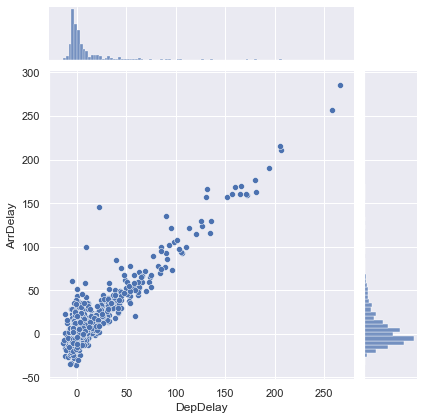

In [4]:
sns.jointplot(df2['DepDelay'],df2['ArrDelay'])

# No muestra una nube de puntos convencional, permite ver si los datos estan muy correlacionados o no, en este caso si y positivamente
# Ademas, añade un histograma para cada una de las dos varaibles que estamos cruzando
# Asi, en una sola visualizacion obtenemos tambien informacion de la distribucion

### Crear un subset de los datos

In [8]:
# Escoger los vuelos que se hayan retrasado en la llegada o en la salida como maximo 40 min
df3 = df2[np.abs(df2['DepDelay']) < 40]
# Que hayan llegado maximo 40 minutos antes de lo que tocaba por eso la funcion absolute
df3 = df3[np.abs(df3['ArrDelay']) < 40]

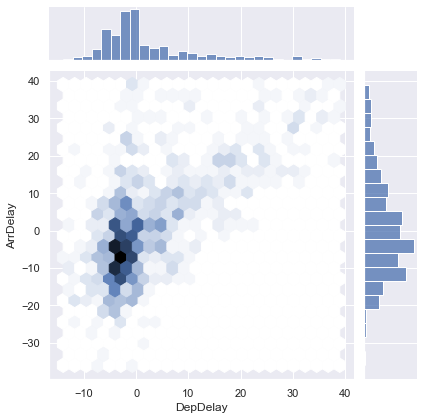

In [9]:
# sns.jointplot(df2['DepDelay'],df2['ArrDelay'],kind='hex') # Al no ejecutar el codigo anterior hace que el grafico tenga bastantes areas en blanco por lo que no lo ahce atractivo

sns.jointplot(df3['DepDelay'],df3['ArrDelay'],kind='hex') # Se logra ver la distribucion univariada de cada una de las variables y ademas una distribucion conjunta mostrada en un formato hexagonal que permite ver donde estan mas concentradas las variables

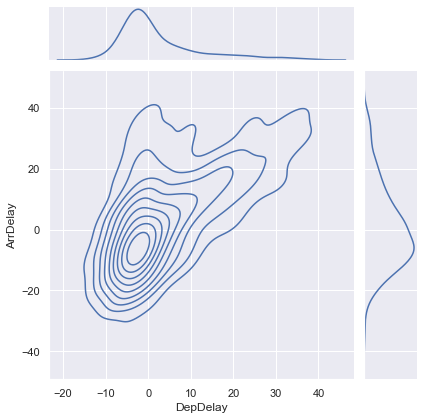

In [10]:
sns.jointplot(df3['DepDelay'],df3['ArrDelay'],kind='kde') # Similar a lo anterior pero en vez de histogramas se tienen plots de densidad y en vez de hexagonos se muestrna curvas de nivel donde se donde es mas frecuente los puntos
# Es mas tecnico que el de los hexagonos

### Crear un nuevo objeto

In [11]:
# Se crea un objeto hecho con dos columnas, el origen y el mes, se hace que las columnas no sean un index con 'as_index=False' y se pueda exportar como un DataFrame estandar, se aplica la media en la columan de retraso 'DepDelay'
gb_df = pd.DataFrame(df2.groupby(['Origin','Month'], as_index=False)['DepDelay'].mean())
gb_df.head()

,Origin,Month,DepDelay
0,ATL,1,10.092308
1,ATL,2,13.043478
2,ATL,3,20.275000
3,ATL,4,9.206897
4,ATL,5,6.333333


### Transformar el objeto para poder graficar con heatmap

In [12]:
data = gb_df.pivot('Month','Origin','DepDelay') # Dependera de los tres parametros (tres columnas), el orden importa, reordena el objeto
data # Muestra los 12 meses respecto a los tres aeropuertos para cada par de variables

Origin,ATL,HOU,IND
Month,,,
1,10.092308,7.000000,1.428571
2,13.043478,8.000000,24.250000
3,20.275000,24.800000,32.142857
4,9.206897,12.750000,-3.428571
5,6.333333,15.000000,-4.000000
6,14.808219,11.230769,-0.500000
7,19.773810,17.090909,-3.800000
8,12.736842,9.555556,36.600000
9,3.189189,-1.454545,-2.615385


### Convertir la tabla en una grafica

<AxesSubplot:xlabel='Origin', ylabel='Month'>

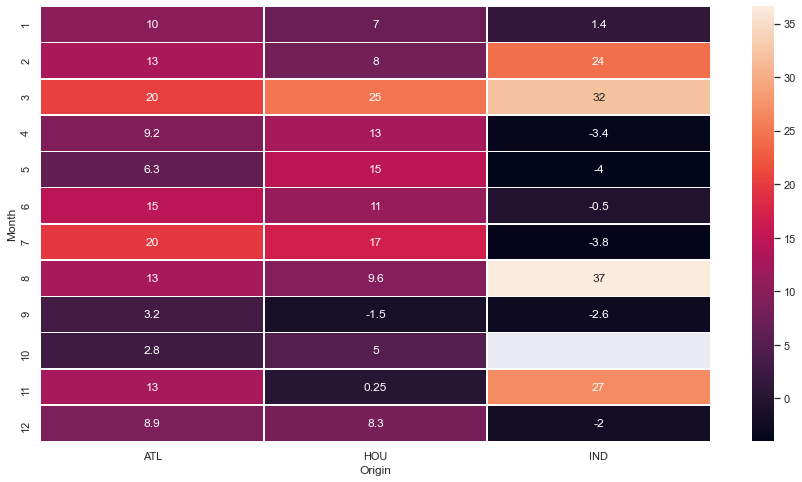

In [13]:
# Ajustar el tamaño del gráfico
sns.set(rc={'figure.figsize':(15,8)}) 
# Creación del mapa de calor
sns.heatmap(data = data, annot=True,linewidths=.5) # Depende de la estructura data, añade el parametro "annot=True" que muestra los valores en los recuadros y se modifica los margenes de cada uno de los cuadros con linewidths

# La gráfica siguiente muestra a la vez dos variables con un valor que, además, es un descriptivo del cruce de estas dos variables y muestra una escala de valores de lado derecho que permite ver en qué mes y en qué aeropuertos los retrasos son más elevados
# Los meses tienen un orden natural
# Los aeropuertos no están ordenados naturalmente

# Este gráfico solo tiene una lectura vertical y de color, pero no horizontal